# Human Trafficking

Estes dados consistem em informações sobre vítimas identificadas e relatadas de tráfico humano. As variáveis captam informações do perfil sociodemográfico das vítimas, o processo de tráfico (como meios de controle utilizados nas vítimas) e tipo de exploração.

Este conjunto de dados pode ser baixado do site da [*Counter Trafficking Data Collaborative*](https://www.ctdatacollaborative.org/) por qualquer pessoa interessada em realizar suas próprias análises. O conjunto de dados globais combina dados de diversos parceiros e é submetido a duas fases de desidentificação de dados. Primeiramente todos os nomes e detalhes de identificação são removidos dos dados antes da combinação e, após a combinação os dados são k-anonimizados (k=11).

K-anonimização (*K-anonymization*) é uma técnica de anonimização de dados que redige casos caindo em conjuntos com menos de k-1 membros, onde cada conjunto é definido por uma combinação única de valores das diferentes variáveis em um conjunto de dados. Isso significa que não é possível consultar um conjunto de dados e ter retorno inferior a um número pré-determinado (k-1) de resultados, independentemente da consulta. Com base em pesquisa e testes, adotou-se k=11 para os dados CTDC, o que significa que os casos foram redigidos a partir do conjunto de dados global de tal forma que as consultas para o conjunto de dados global não podem retornar menos de 10 resultados.

Salienta-se que este conjunto de dados não pode ser considerado uma amostra aleatória ou necessariamente representativa de todas as vítimas do tráfico de seres humanos a nível mundial, devido à natureza deste crime oculto.  O conjunto de dados é composto por casos identificados ou auto notificados de vítimas de tráfico. Na medida em que certos tipos de tráfico humano podem ser mais propensos a serem identificados, reconhecidos ou relatados, esse conjunto de dados será tendencioso em relação a esses tipos de tráfico em comparação com a população de vítimas de tráfico no mundo (identificados e não identificado). Os dados também podem ter um viés geográfico à medida que são coletados em locais onde as operações de combate ao tráfico são conduzidas. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px        
import plotly.figure_factory as ff 
import chart_studio.plotly as py
import plotly.graph_objects as go
%matplotlib inline

In [13]:
# lendo os dados
dados = pd.read_csv('The Global Dataset 14 Apr 2020.csv',na_values='-99')
dados.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [14]:
lon_lat_country = pd.read_excel('lon_lat_country.xlsx')
lon_lat_country.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


## Análise de valores ausentes

In [15]:
ausentes = pd.DataFrame(\
    dict(\
        colunas = dados.columns,\
        missing_porc = dados.apply(lambda col: col.isna().sum()/dados.shape[0]*100)\
        )\
    ).reset_index(drop = True)
ausentes.sort_values(ascending=False,by = 'missing_porc',inplace=True)
ausentes

,colunas,missing_porc
20,meansOfControlUsesChildren,99.690580
10,meansOfControlRestrictsFinancialAccess,99.481568
34,isSlaveryAndPractices,96.745968
21,meansOfControlThreatOfLawEnforcement,95.885330
8,meansOfControlDebtBondage,94.885351
...,...,...
7,citizenship,0.569660
62,recruiterRelationUnknown,0.157784
1,Datasource,0.000000
2,gender,0.000000


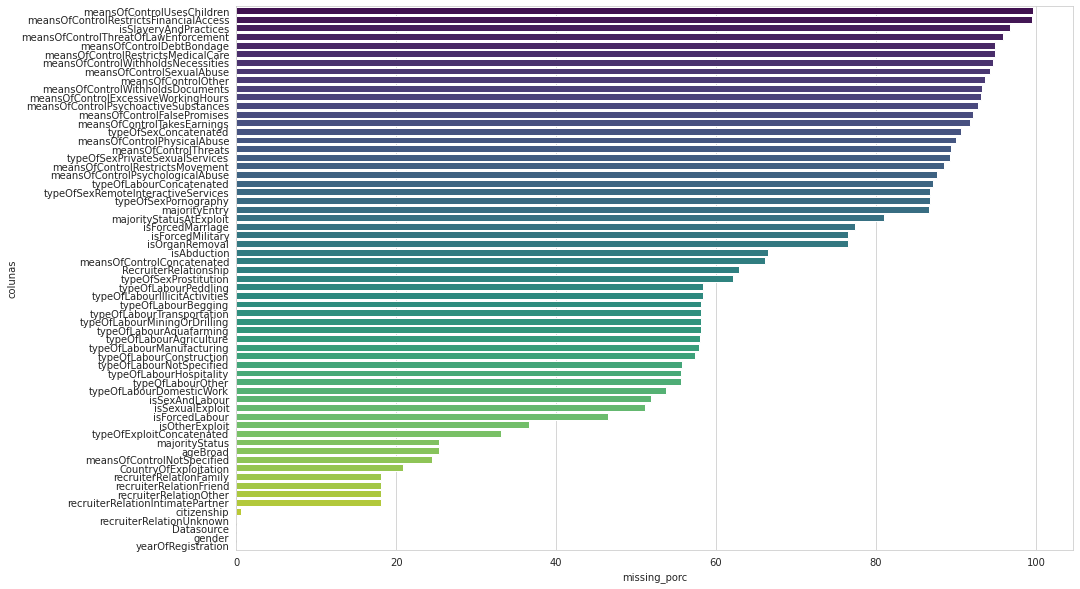

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(
    x = 'missing_porc', 
    y = 'colunas', 
    data = ausentes, 
    palette = 'viridis',
    orient='h')\
;plt.show()

In [17]:
ausentes['missing_porc'].describe()

count    63.000000
mean     62.076434
std      30.600992
min       0.000000
25%      48.809451
50%      62.177005
75%      89.740989
max      99.690580
Name: missing_porc, dtype: float64

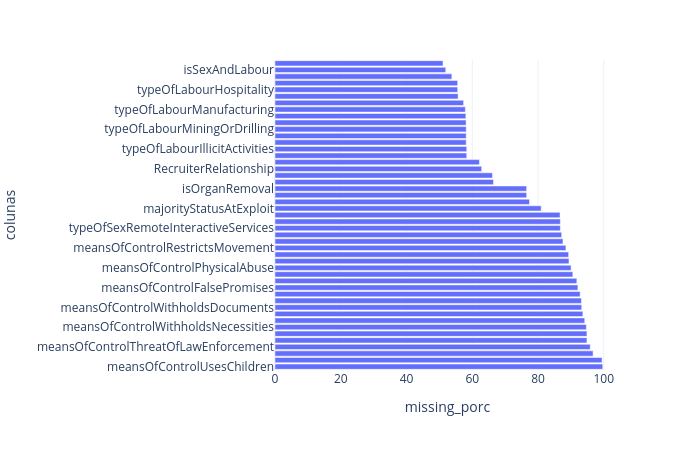

In [18]:
fig_plotly = px.bar(
    ausentes.query('missing_porc > 50'), 
    x = 'missing_porc',
    y = 'colunas',
    template='plotly_white', 
    orientation='h')
fig_plotly.show(renderer = 'png')

## Quantidade de casos ao longo dos anos

In [19]:
(
dados
.groupby('yearOfRegistration')
.agg(contagem_casos = ('yearOfRegistration','count'))
.reset_index()
)

,yearOfRegistration,contagem_casos
0,2002,1026
1,2003,357
2,2004,223
3,2005,1455
4,2006,1423
5,2007,1417
6,2008,802
7,2009,587
8,2010,943
9,2011,1340


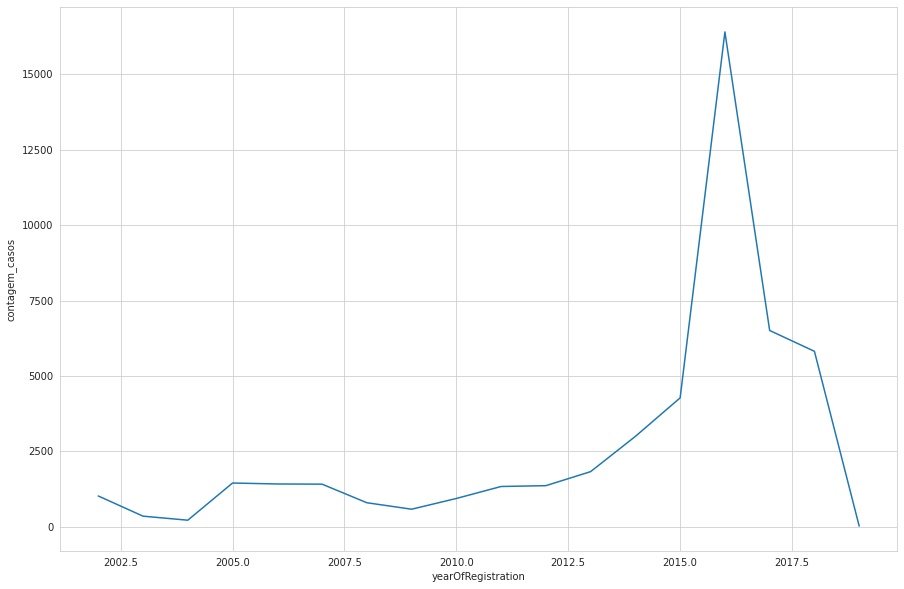

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(
    x='yearOfRegistration', y = 'contagem_casos',
    data = dados
    .groupby('yearOfRegistration')
    .agg(contagem_casos = ('yearOfRegistration','count'))
    .reset_index(),
    palette='viridis'
    )\
;plt.show()


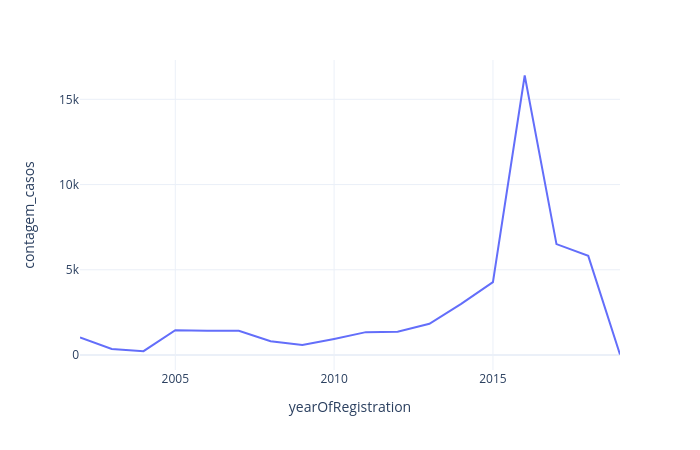

In [21]:
fig_plotly = px.line(
    data_frame = dados
    .groupby('yearOfRegistration')
    .agg(contagem_casos = ('yearOfRegistration','count'))
    .reset_index(),
    x='yearOfRegistration', 
    y = 'contagem_casos',
    template = 'plotly_white'
    )
fig_plotly.show(renderer = 'png')

Há um pico dos registros em 2016. Além disso, aparentemente os dados de 2019 ainda estão sendo introduzidos na base de dado, desta forma optarei pela retirada destes dados.

In [22]:
dados.query('yearOfRegistration != 2019',inplace=True)

## Nacionalidade das pessoas exploradas e respectivos países de exploração

In [23]:
dados.get('citizenship').value_counts() # nacionalidade da pessoa explorada

PH    11365
0      8858
UA     7761
MD     5901
US     3636
KH     1979
ID     1971
BY     1463
MM     1250
RO      655
GH      544
KG      437
BG      342
HT      339
UZ      261
VN      170
GW      145
LA      126
CO      124
NG      108
AF       97
MG       94
LK       85
SL       81
UG       70
SN       70
TH       55
KZ       54
CD       53
ML       45
TJ       43
BF       33
KE       32
NE       31
CI       31
NP       27
TM       26
CN       23
AL       22
MX       19
BO       18
GN       15
ER       13
KR       12
BD       11
Name: citizenship, dtype: int64

In [24]:
dados.get('CountryOfExploitation').value_counts() # pais de exploracao

US    12512
UA     5399
MD     4504
RU     2738
PH     1988
ID     1777
KH     1000
MY      930
0       844
GH      544
AE      504
BY      400
TH      391
SN      370
BG      356
HT      339
PL      326
SA      278
RO      259
RS      248
QA      239
KZ      222
KW      209
TR      197
MK      194
UZ      193
BA      127
UG      123
JP      111
JO      108
MG       94
OM       94
TT       85
AF       83
SL       81
CN       79
LB       73
TJ       54
IN       46
SY       41
CZ       38
SG       37
ZA       36
TW       33
HK       31
BD       26
TM       26
IT       24
AT       24
BH       22
AL       22
MU       20
AR       18
DK       17
VN       16
EG       13
EC       13
CY       11
LY       11
Name: CountryOfExploitation, dtype: int64

Tanto no país de exploração como na nacionalidade há o código 0, sendo que este não corresponde a nenhum dos códigos da ISO 3166-1 e não há referência deste no dicionário, acredito que também correspondam a informações ausentes, sendo assim, optarei posteriormente na anáĺise via mapa pela retirada destas observações. 

## Perfil sociodemográfico

In [25]:
dados.get('gender').value_counts(dropna = False)/dados.shape[0]*100

Female    72.798475
Male      27.201525
Name: gender, dtype: float64

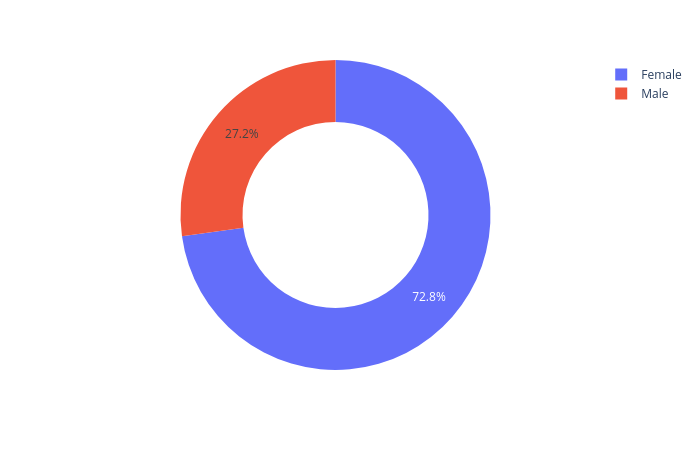

In [26]:
fig = px.pie(
    pd.DataFrame(dados.get('gender').value_counts(dropna = False)).reset_index().rename(columns = {'index':'gender','gender':'count'}),
    values='count',
    names='gender',
    hole= 0.6)
fig.show(renderer = 'png')

In [27]:
# definindo as categorias de ageBroad para ficarem ordenadas em tabelas e graficos
levels_ageBroad = pd.CategoricalDtype(
    categories = ['0--8','9--17','18--20','21--23','24--26','27--29','30--38','39--47', '48+'],
    ordered = True
    )

dados['ageBroad'] = dados['ageBroad'].astype(levels_ageBroad)
(
(dados
.get('ageBroad')
.value_counts(dropna = False)/dados.shape[0]*100).reset_index().sort_values(by = 'index')
)

,index,ageBroad
9,0--8,3.190290
1,9--17,17.724971
3,18--20,9.119800
4,21--23,8.637976
5,24--26,7.102290
7,27--29,5.414881
2,30--38,14.510077
6,39--47,5.783938
8,48+,3.198491
0,NaN,25.317286


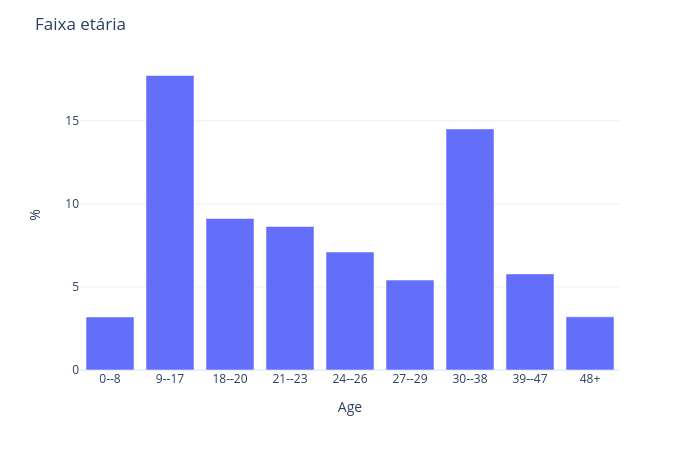

In [28]:
fig_plotly = px.bar(
    (dados.get('ageBroad').value_counts()/dados.shape[0]*100).reset_index().sort_values(by = 'index'),
    x = 'index',
    y = 'ageBroad',
    template='plotly_white'
)
fig_plotly.update_layout(
    title = "Faixa etária",
    xaxis_title = "Age",
    yaxis_title = "%"
    )
fig_plotly.show(renderer = 'png')

In [29]:
# status maioridade: Indica se o indivíduo tinha menos de 18 no momento em que foi registrado 
dados.get('majorityStatus').value_counts(dropna = False)

Adult    26224
NaN      12348
Minor    10201
Name: majorityStatus, dtype: int64

In [30]:
# status maioridade na exploracao: A idade do indivíduo na época que a exploração do indivíduo começou
dados.get('majorityStatusAtExploit').value_counts(dropna = False)

NaN      39511
Minor     7040
Adult     2222
Name: majorityStatusAtExploit, dtype: int64

## Meios de controle

In [31]:
# meansOfControlConcatenated simplesmente concatena os demais meios
dados.drop(columns = 'meansOfControlConcatenated',inplace = True)
means = (
    dados.
    get(
        dados.columns[dados.columns.str.startswith('means')]
        )
        .apply(lambda coluna: coluna.value_counts(dropna = False)/dados.shape[0])
).reset_index()
means = means.melt(
    value_vars = dados.columns[dados.columns.str.startswith('means')],
    id_vars=['index'],
    value_name = 'Porcentagem',
    var_name = 'Meio de controle'
)
means

,index,Meio de controle,Porcentagem
0,0.0,meansOfControlDebtBondage,0.024337
1,1.0,meansOfControlDebtBondage,0.026265
2,NaN,meansOfControlDebtBondage,0.949398
3,0.0,meansOfControlTakesEarnings,0.024460
4,1.0,meansOfControlTakesEarnings,0.056917
5,NaN,meansOfControlTakesEarnings,0.918623
6,0.0,meansOfControlRestrictsFinancialAccess,0.002235
7,1.0,meansOfControlRestrictsFinancialAccess,0.002378
8,NaN,meansOfControlRestrictsFinancialAccess,0.995387
9,0.0,meansOfControlThreats,0.023866


In [32]:
means.query('index!=index').sort_values(by = 'Porcentagem')

,index,Meio de controle,Porcentagem
53,NaN,meansOfControlNotSpecified,0.244890
14,NaN,meansOfControlPsychologicalAbuse,0.876407
29,NaN,meansOfControlRestrictsMovement,0.885346
11,NaN,meansOfControlThreats,0.894696
17,NaN,meansOfControlPhysicalAbuse,0.901154
5,NaN,meansOfControlTakesEarnings,0.918623
23,NaN,meansOfControlFalsePromises,0.921842
26,NaN,meansOfControlPsychoactiveSubstances,0.928629
35,NaN,meansOfControlExcessiveWorkingHours,0.932565
47,NaN,meansOfControlWithholdsDocuments,0.933447


Com exceção de ControlNotSpecified todos os demais meios de controle apresentam no minimo 87% de NaN.

### Investigando alguns meios de controle especificos ao longo do tempo

In [33]:
# controle por ameacas
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('meansOfControlThreats').fillna('missing')
)


meansOfControlThreats,0.0,1.0,missing
yearOfRegistration,,,
2002,0,0,1026
2003,0,0,357
2004,0,0,223
2005,0,1,1454
2006,0,1,1422
2007,0,4,1413
2008,0,111,691
2009,0,166,421
2010,0,197,746


In [34]:
# controle por abuso fisico
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('meansOfControlPhysicalAbuse').fillna('missing')
)

meansOfControlPhysicalAbuse,0.0,1.0,missing
yearOfRegistration,,,
2002,0,0,1026
2003,0,0,357
2004,0,0,223
2005,0,1,1454
2006,0,1,1422
2007,0,4,1413
2008,0,112,690
2009,1,168,418
2010,5,143,795


In [35]:
# controle por abuso sexual
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('meansOfControlSexualAbuse').fillna('missing')
)

meansOfControlSexualAbuse,0.0,1.0,missing
yearOfRegistration,,,
2002,0,0,1026
2003,0,0,357
2004,0,0,223
2005,0,1,1454
2006,0,0,1423
2007,0,4,1413
2008,3,68,731
2009,1,142,444
2010,6,58,879


In [36]:
# controle por falsas promessas
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('meansOfControlFalsePromises').fillna('missing')
)


meansOfControlFalsePromises,0.0,1.0,missing
yearOfRegistration,,,
2002,0,0,1026
2003,0,0,357
2004,0,0,223
2005,0,0,1455
2006,0,1,1422
2007,0,4,1413
2008,0,122,680
2009,0,184,403
2010,0,201,742


In [37]:
# controle por substancias psicoativas
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('meansOfControlPsychoactiveSubstances').fillna('missing')
)

meansOfControlPsychoactiveSubstances,0.0,1.0,missing
yearOfRegistration,,,
2002,0,0,1026
2003,0,0,357
2004,0,0,223
2005,0,0,1455
2006,0,0,1423
2007,0,2,1415
2008,1,29,772
2009,0,70,517
2010,0,48,895


In [38]:
# controle por trabalho excessivo
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('meansOfControlExcessiveWorkingHours').fillna('missing')
)

meansOfControlExcessiveWorkingHours,0.0,1.0,missing
yearOfRegistration,,,
2002,0,0,1026
2003,0,0,357
2004,0,0,223
2005,0,0,1455
2006,0,1,1422
2007,0,0,1417
2008,0,102,700
2009,0,154,433
2010,1,174,768


In [39]:
# controle restricao de documentos
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('meansOfControlWithholdsDocuments').fillna('missing')
)

meansOfControlWithholdsDocuments,0.0,1.0,missing
yearOfRegistration,,,
2002,0,0,1026
2003,0,0,357
2004,0,0,223
2005,0,1,1454
2006,0,1,1422
2007,0,4,1413
2008,1,101,700
2009,0,153,434
2010,0,128,815


## Propósito para o qual as vítimas foram traficadas

In [40]:
proposito = (
    dados.
    get(
        dados.columns[dados.columns.str.startswith('is')]
        )
        .apply(lambda coluna: coluna.value_counts(dropna = False)/dados.shape[0])
).reset_index()
proposito

,index,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,isForcedMilitary,isOrganRemoval,isSlaveryAndPractices,isAbduction
0,0.0,0.334242,0.159802,0.488918,0.478748,0.222049,0.234187,0.234187,0.024624,0.334283
1,1.0,0.200357,0.328850,0.144834,0.001599,0.003445,NaN,NaN,0.007361,0.000800
2,NaN,0.465401,0.511348,0.366248,0.519652,0.774506,0.765813,0.765813,0.968015,0.664917


### Investigando alguns propositos especificos ao longo do tempo

In [41]:
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('isForcedLabour').fillna('missing')
)


isForcedLabour,0.0,1.0,missing
yearOfRegistration,,,
2002,919,0,107
2003,357,0,0
2004,223,0,0
2005,614,817,24
2006,559,622,242
2007,312,251,854
2008,38,66,698
2009,36,15,536
2010,11,260,672


In [42]:
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('isSexualExploit').fillna('missing')
)

isSexualExploit,0.0,1.0,missing
yearOfRegistration,,,
2002,52,867,107
2003,0,357,0
2004,63,160,0
2005,939,492,24
2006,760,318,345
2007,219,344,854
2008,38,23,741
2009,51,0,536
2010,237,38,668


In [43]:
pd.crosstab(
    index = dados.get('yearOfRegistration'),
    columns= dados.get('isOtherExploit').fillna('missing')
)

isOtherExploit,0.0,1.0,missing
yearOfRegistration,,,
2002,919,0,107
2003,357,0,0
2004,223,0,0
2005,1420,11,24
2006,1078,0,345
2007,563,0,854
2008,61,0,741
2009,51,0,536
2010,248,12,683


## Tipos de trabalhos que as vítimas foram forçadas a realizar

In [44]:
dados.drop(
    columns = ['typeOfSexConcatenated','typeOfLabourConcatenated','typeOfExploitConcatenated'], 
    inplace = True
    )
trabalho = (
    dados.
    get(
        dados.columns[dados.columns.str.startswith('type')]
        )
        .apply(lambda coluna: coluna.value_counts(dropna = False)/dados.shape[0])
).reset_index()

trabalho

,index,typeOfLabourAgriculture,typeOfLabourAquafarming,typeOfLabourBegging,typeOfLabourConstruction,typeOfLabourDomesticWork,typeOfLabourHospitality,typeOfLabourIllicitActivities,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices
0,0.0,0.416050,0.416173,0.415045,0.400180,0.405532,0.442273,0.416501,0.411375,0.4181,0.415025,0.4181,0.440715,0.418736,0.287946,0.128268,0.131548,0.106042
1,1.0,0.003116,0.002194,0.003055,0.025711,0.056261,0.001681,NaN,0.009288,NaN,0.001476,NaN,0.003301,0.024009,0.089927,0.003281,NaN,0.000882
2,NaN,0.580834,0.581633,0.581900,0.574109,0.538208,0.556045,0.583499,0.579337,0.5819,0.583499,0.5819,0.555984,0.557255,0.622127,0.868452,0.868452,0.893076


## O tipo de relacionamento que a pessoa exploradora tinha inicialmente com a vítima

In [45]:
relacionamento = (
    dados.
    get(
        dados.columns[dados.columns.str.startswith('recruiter')]
        )
        .apply(lambda coluna: coluna.value_counts(dropna = False)/dados.shape[0])
).reset_index()

relacionamento

,index,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,0.0,0.786685,0.777028,0.781477,0.728149,0.195128
1,1.0,0.033318,0.042975,0.038525,0.091854,0.803867
2,NaN,0.179997,0.179997,0.179997,0.179997,0.001005


## Mapas da quantidade de pessoas traficadas

In [46]:
# retirando observacoes sem nacionalidade ou pais de exploracao
dados.query('citizenship != "0" & CountryOfExploitation != "0"',inplace=True)

# adicionando os nomes dos paises de nascimento e exploracao além de longitude e latitude

dados = dados.merge(
    lon_lat_country,
    left_on = 'citizenship',
    right_on = 'country',
    how = 'left'
)

dados.rename(
    columns={'name':'nacionalidade',
    'latitude':'nacionalidade_lat',
    'longitude':'nacionalidade_long'},
     inplace = True) 

dados.drop(columns = 'country',inplace=True)

dados = dados.merge(
    lon_lat_country,
    left_on = 'CountryOfExploitation',
    right_on = 'country',
    how = 'left'
)

dados.rename(
    columns={'name':'pais_exploracao',
    'latitude':'pais_exploracao_lat',
    'longitude':'pais_exploracao_long'},
     inplace = True) 

dados.drop(columns = 'country',inplace=True)

In [47]:
dados.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,nacionalidade_lat,nacionalidade_long,nacionalidade,pais_exploracao_lat,pais_exploracao_long,pais_exploracao
0,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,0.0,0.0,1.0,4.570868,-74.297333,Colombia,-22.95764,18.49041,Namibia
1,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,0.0,0.0,1.0,4.570868,-74.297333,Colombia,-22.95764,18.49041,Namibia
2,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,0.0,0.0,1.0,4.570868,-74.297333,Colombia,-22.95764,18.49041,Namibia
3,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,0.0,0.0,1.0,4.570868,-74.297333,Colombia,-22.95764,18.49041,Namibia
4,2002,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,NaN,...,0.0,0.0,0.0,1.0,4.570868,-74.297333,Colombia,-22.95764,18.49041,Namibia


In [48]:
dados.shape

(39071, 65)

### citizenship: nacionalidade

In [49]:
map_chor = dados.get('citizenship').value_counts().reset_index()
map_chor.rename(columns={'index':'code','citizenship':'contagem'}, inplace=True)
map_chor.head()

,code,contagem
0,PH,11365
1,UA,7761
2,MD,5432
3,US,3636
4,KH,1979


In [50]:
map_chor = map_chor.merge(
    lon_lat_country.get(['country','name']),
    how="left",
    left_on='code',
    right_on="country")
map_chor.drop(columns=['country'],inplace = True)
map_chor.head()    

,code,contagem,name
0,PH,11365,Philippines
1,UA,7761,Ukraine
2,MD,5432,Moldova
3,US,3636,United States
4,KH,1979,Cambodia


In [51]:
# o padrao de codigo do plotly é o de alpha 3
alpha = pd.read_csv('alpha2_alpha3.csv')
alpha.head()

,alpha_2,alpha_3
0,AF,AFG
1,AL,ALB
2,DZ,DZA
3,AS,ASM
4,AD,AND


In [52]:
map_chor = map_chor.merge(alpha, how='left',left_on='code',right_on='alpha_2')
map_chor.drop(columns=['alpha_2'],inplace = True)
map_chor.head()

,code,contagem,name,alpha_3
0,PH,11365,Philippines,PHL
1,UA,7761,Ukraine,UKR
2,MD,5432,Moldova,MDA
3,US,3636,United States,USA
4,KH,1979,Cambodia,KHM


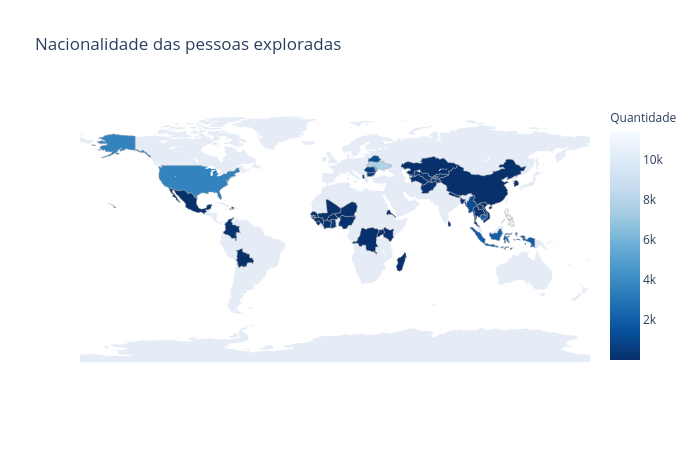

In [53]:
fig = go.Figure(data=go.Choropleth(
    locations = map_chor['alpha_3'],
    z = map_chor['contagem'],
    text = map_chor['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Quantidade',
))

fig.update_layout(
    title_text='Nacionalidade das pessoas exploradas',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show(renderer = 'png')

### Plotando como orthographic

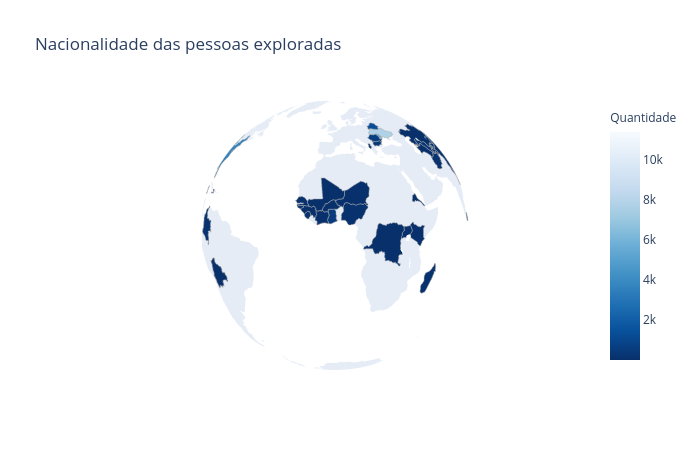

In [54]:
fig = go.Figure(data=go.Choropleth(
    locations = map_chor['alpha_3'],
    z = map_chor['contagem'],
    text = map_chor['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Quantidade',
))

fig.update_layout(
    title_text='Nacionalidade das pessoas exploradas',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic'
    )
)

fig.show(renderer = 'png')

### CountryOfExploitation: pais onde a pessoa foi explorada

In [55]:
map_chor = dados.get('CountryOfExploitation').value_counts().reset_index()
map_chor.rename(columns={'index':'code','CountryOfExploitation':'contagem'}, inplace=True)
map_chor = map_chor.merge(
    lon_lat_country.get(['country','name']),
    how="left",
    left_on='code',
    right_on="country")
map_chor.drop(columns=['country'],inplace = True)
map_chor = map_chor.merge(alpha, how='left',left_on='code',right_on='alpha_2')
map_chor.drop(columns=['alpha_2'],inplace = True)
map_chor.head()

,code,contagem,name,alpha_3
0,UA,5363,Ukraine,UKR
1,MD,4504,Moldova,MDA
2,US,3690,United States,USA
3,RU,2738,Russia,RUS
4,RU,2738,Russia,RUS


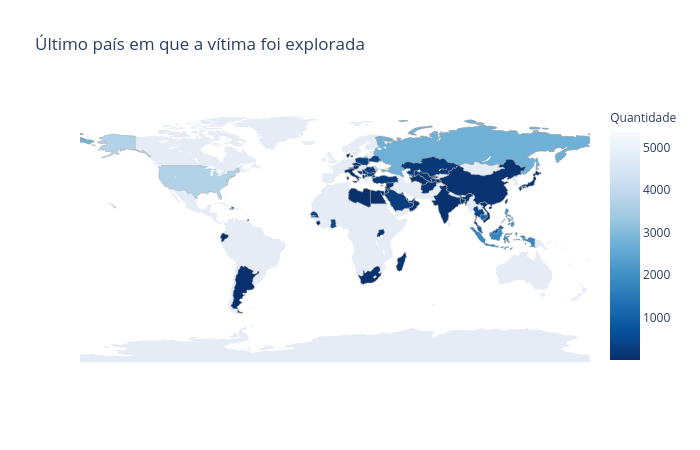

In [56]:
fig = go.Figure(data=go.Choropleth(
    locations = map_chor['alpha_3'],
    z = map_chor['contagem'],
    text = map_chor['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Quantidade',
))

fig.update_layout(
    title_text='Último país em que a vítima foi explorada',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show(renderer = 'png')


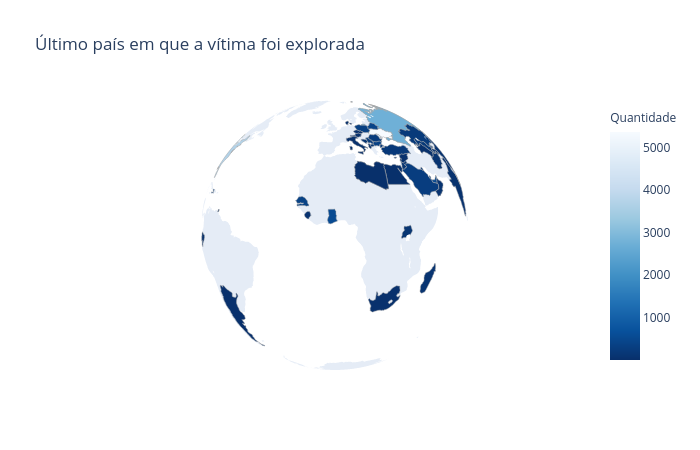

In [57]:
fig = go.Figure(data=go.Choropleth(
    locations = map_chor['alpha_3'],
    z = map_chor['contagem'],
    text = map_chor['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Quantidade',
))

fig.update_layout(
    title_text='Último país em que a vítima foi explorada',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic'
    )
)

fig.show(renderer = 'png')

## Mapas de fluxo de tráfico

In [58]:
dados_lines = (
    dados
    .get(['nacionalidade_lat',
    'nacionalidade_long',
    'nacionalidade',
    'pais_exploracao_lat',
    'pais_exploracao_long',
    'pais_exploracao'])
)
dados_lines_group = (
    dados_lines
    .get(['nacionalidade','pais_exploracao'])
    .groupby(['nacionalidade','pais_exploracao'])
    .agg(
       quantidade = ('pais_exploracao','count')
    )
    .reset_index()
)
dados_lines_group.head()

,nacionalidade,pais_exploracao,quantidade
0,Afghanistan,Afghanistan,83
1,Afghanistan,Saudi Arabia,14
2,Albania,Albania,22
3,Bangladesh,Tajikistan,11
4,Belarus,Belarus,400


In [59]:
dados_lines_group = (
    dados_lines_group
    .merge(
        dados_lines
        .get(['nacionalidade','nacionalidade_long','nacionalidade_lat'])
        .drop_duplicates(),
        how = 'outer',
        on = 'nacionalidade'
        )
)
dados_lines_group.head()

,nacionalidade,pais_exploracao,quantidade,nacionalidade_long,nacionalidade_lat
0,Afghanistan,Afghanistan,83,67.709953,33.939110
1,Afghanistan,Saudi Arabia,14,67.709953,33.939110
2,Albania,Albania,22,20.168331,41.153332
3,Bangladesh,Tajikistan,11,90.356331,23.684994
4,Belarus,Belarus,400,27.953389,53.709807


In [60]:
dados_lines_group = dados_lines_group.merge(
        dados_lines
        .get(['pais_exploracao','pais_exploracao_long','pais_exploracao_lat'])
        .drop_duplicates(),
        how = 'left',
        on = 'pais_exploracao'
        )

dados_lines_group.head()

,nacionalidade,pais_exploracao,quantidade,nacionalidade_long,nacionalidade_lat,pais_exploracao_long,pais_exploracao_lat
0,Afghanistan,Afghanistan,83,67.709953,33.939110,67.709953,33.939110
1,Afghanistan,Saudi Arabia,14,67.709953,33.939110,45.079162,23.885942
2,Albania,Albania,22,20.168331,41.153332,20.168331,41.153332
3,Bangladesh,Tajikistan,11,90.356331,23.684994,71.276093,38.861034
4,Belarus,Belarus,400,27.953389,53.709807,27.953389,53.709807


In [61]:
dados_lines_group = ( 
    dados_lines_group
    .assign(
        texto = 'Nacionalidade: '+ 
        dados_lines_group['nacionalidade'] + 
        '<br>' +
        'Pais exploração: ' + 
        dados_lines_group['pais_exploracao']+
        '<br>' +
        'Quantidade de pessoas: ' +
        dados_lines_group['quantidade'].astype(str)
        )
)
cores = pd.DataFrame(
    dict(nacionalidade = dados_lines_group.get('nacionalidade').drop_duplicates(),
    cor = sns.color_palette('hls', dados_lines_group.get('nacionalidade').drop_duplicates().shape[0]).as_hex()
    )
    )
cores

,nacionalidade,cor
0,Afghanistan,#db5f57
2,Albania,#db7057
3,Bangladesh,#db8257
4,Belarus,#db9457
9,Bolivia,#dba557
10,Bulgaria,#dbb757
11,Burkina Faso,#dbc957
12,Cambodia,#dbda57
19,China,#cbdb57
20,Colombia,#b9db57


In [62]:
dados_lines_group = dados_lines_group.merge(
    cores,
    how = 'left',
    on = 'nacionalidade'
)
dados_lines_group.head()

,nacionalidade,pais_exploracao,quantidade,nacionalidade_long,nacionalidade_lat,pais_exploracao_long,pais_exploracao_lat,texto,cor
0,Afghanistan,Afghanistan,83,67.709953,33.939110,67.709953,33.939110,Nacionalidade: Afghanistan<br>Pais exploração:...,#db5f57
1,Afghanistan,Saudi Arabia,14,67.709953,33.939110,45.079162,23.885942,Nacionalidade: Afghanistan<br>Pais exploração:...,#db5f57
2,Albania,Albania,22,20.168331,41.153332,20.168331,41.153332,Nacionalidade: Albania<br>Pais exploração: Alb...,#db7057
3,Bangladesh,Tajikistan,11,90.356331,23.684994,71.276093,38.861034,Nacionalidade: Bangladesh<br>Pais exploração: ...,#db8257
4,Belarus,Belarus,400,27.953389,53.709807,27.953389,53.709807,Nacionalidade: Belarus<br>Pais exploração: Bel...,#db9457


In [63]:
# filtrando as pessoas com nacionalidade e pais diferentes para melhorar a visualizacao

dados_lines_group = dados_lines_group.query('nacionalidade != pais_exploracao')

In [64]:
# necessario resetar o indice
dados_lines_group = dados_lines_group.reset_index(drop = True)
dados_lines_group.head()

,nacionalidade,pais_exploracao,quantidade,nacionalidade_long,nacionalidade_lat,pais_exploracao_long,pais_exploracao_lat,texto,cor
0,Afghanistan,Saudi Arabia,14,67.709953,33.939110,45.079162,23.885942,Nacionalidade: Afghanistan<br>Pais exploração:...,#db5f57
1,Bangladesh,Tajikistan,11,90.356331,23.684994,71.276093,38.861034,Nacionalidade: Bangladesh<br>Pais exploração: ...,#db8257
2,Belarus,Cyprus,11,27.953389,53.709807,33.429859,35.126413,Nacionalidade: Belarus<br>Pais exploração: Cyp...,#db9457
3,Belarus,Poland,12,27.953389,53.709807,19.145136,51.919438,Nacionalidade: Belarus<br>Pais exploração: Pol...,#db9457
4,Belarus,Russia,751,27.953389,53.709807,105.318756,61.524010,Nacionalidade: Belarus<br>Pais exploração: Rus...,#db9457


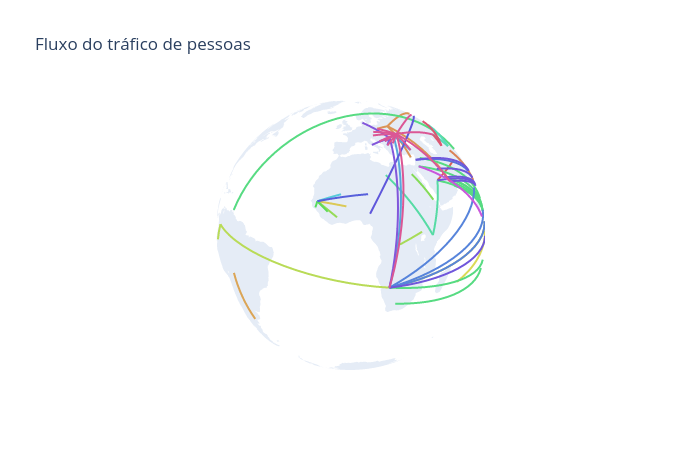

In [65]:
fig = go.Figure()

for i in range(0,dados_lines_group.shape[0]):
    fig.add_trace(
        go.Scattergeo(
            lon = [dados_lines_group['nacionalidade_long'][i], dados_lines_group['pais_exploracao_long'][i]],
            lat = [dados_lines_group['nacionalidade_lat'][i], dados_lines_group['pais_exploracao_lat'][i]],
            mode = 'lines',
            line = dict(
                width = 2, color = dados_lines_group['cor'][i]
            ),
            text = dados_lines_group['texto'][i],
        )
    )


fig.update_layout(
    title_text='Fluxo do tráfico de pessoas',
    showlegend = False,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='orthographic'
    )
)

fig.show(renderer = 'png')


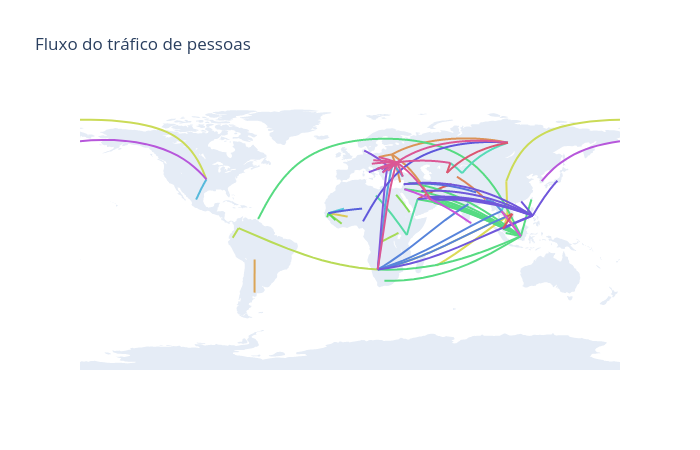

In [66]:
fig = go.Figure()

for i in range(0,dados_lines_group.shape[0]):
    fig.add_trace(
        go.Scattergeo(
            lon = [dados_lines_group['nacionalidade_long'][i], dados_lines_group['pais_exploracao_long'][i]],
            lat = [dados_lines_group['nacionalidade_lat'][i], dados_lines_group['pais_exploracao_lat'][i]],
            mode = 'lines',
            line = dict(
                width = 2, color = dados_lines_group['cor'][i]
            ),
            text = dados_lines_group['texto'][i],
        )
    )


fig.update_layout(
    title_text='Fluxo do tráfico de pessoas',
    showlegend = False,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show(renderer = 'png')